In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Data Loading

In [4]:
matches = pd.read_csv('./dataset/t20i_Matches_Data.csv')
batting = pd.read_csv('./dataset/t20i_Batting_Card.csv')
bowling = pd.read_csv('./dataset/t20i_Bowling_Card.csv')
players = pd.read_csv('./dataset/players_info.csv')
partnership = pd.read_csv('./dataset/t20i_Partnership_Card.csv')
fow = pd.read_csv('./dataset/t20i_Fow_Card.csv')

print(f"Matches: {matches.shape}")
print(f"Batting: {batting.shape}")
print(f"Bowling: {bowling.shape}")
print(f"Players: {players.shape}")
print(f"Partnership: {partnership.shape}")
print(f"Fall of Wickets: {fow.shape}")

Matches: (2592, 33)
Batting: (56357, 13)
Bowling: (30648, 16)
Players: (6701, 11)
Partnership: (36799, 13)
Fall of Wickets: (33093, 7)


## Data Schema Inspection

In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   T20I Match No          2592 non-null   int64  
 1   Match ID               2592 non-null   int64  
 2   Match Name             2592 non-null   object 
 3   Series ID              2592 non-null   int64  
 4   Series Name            2592 non-null   object 
 5   Match Date             2581 non-null   object 
 6   Match Format           2592 non-null   object 
 7   Team1 ID               2592 non-null   int64  
 8   Team1 Name             2592 non-null   object 
 9   Team1 Captain          2592 non-null   int64  
 10  Team1 Runs Scored      2579 non-null   float64
 11  Team1 Wickets Fell     2579 non-null   float64
 12  Team1 Extras Rec       2579 non-null   float64
 13  Team2 ID               2592 non-null   int64  
 14  Team2 Name             2592 non-null   object 
 15  Team

In [6]:
batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56357 entries, 0 to 56356
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Match ID    56357 non-null  int64  
 1   innings     56357 non-null  int64  
 2   team        56331 non-null  object 
 3   batsman     56331 non-null  float64
 4   runs        41872 non-null  float64
 5   balls       41872 non-null  float64
 6   fours       41872 non-null  float64
 7   sixes       41872 non-null  float64
 8   strikeRate  41872 non-null  float64
 9   isOut       56331 non-null  object 
 10  wicketType  56331 non-null  object 
 11  fielders    32083 non-null  object 
 12  bowler      27757 non-null  float64
dtypes: float64(7), int64(2), object(4)
memory usage: 5.6+ MB


In [7]:
bowling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30648 entries, 0 to 30647
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Match ID    30648 non-null  int64  
 1   innings     30648 non-null  int64  
 2   team        30622 non-null  object 
 3   opposition  30622 non-null  object 
 4   bowler id   30622 non-null  float64
 5   overs       30622 non-null  float64
 6   balls       30622 non-null  float64
 7   maidens     30622 non-null  float64
 8   conceded    30622 non-null  float64
 9   wickets     30622 non-null  float64
 10  economy     30622 non-null  float64
 11  dots        28275 non-null  float64
 12  fours       28275 non-null  float64
 13  sixes       28275 non-null  float64
 14  wides       30622 non-null  float64
 15  noballs     30622 non-null  float64
dtypes: float64(12), int64(2), object(2)
memory usage: 3.7+ MB


## Data Quality Assessment

In [8]:
matches_missing = matches.isnull().sum()
matches_missing_pct = (matches_missing / len(matches)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': matches_missing,
    'Missing_Percentage': matches_missing_pct
}).sort_values('Missing_Count', ascending=False)

missing_df[missing_df['Missing_Count'] > 0]

,Missing_Count,Missing_Percentage
Match Referee,481,18.557099
MOM Player,301,11.612654
Match Winner,98,3.780864
Team2 Wickets Fell,50,1.929012
Team2 Runs Scored,50,1.929012
Team2 Extras Rec,50,1.929012
Team1 Extras Rec,13,0.501543
Team1 Runs Scored,13,0.501543
Team1 Wickets Fell,13,0.501543
Match Date,11,0.424383


In [9]:
batting_missing = batting.isnull().sum()
batting_missing_pct = (batting_missing / len(batting)) * 100
batting_missing_df = pd.DataFrame({
    'Missing_Count': batting_missing,
    'Missing_Percentage': batting_missing_pct
}).sort_values('Missing_Count', ascending=False)

batting_missing_df[batting_missing_df['Missing_Count'] > 0]

,Missing_Count,Missing_Percentage
bowler,28600,50.747911
fielders,24274,43.071846
balls,14485,25.702220
fours,14485,25.702220
runs,14485,25.702220
strikeRate,14485,25.702220
sixes,14485,25.702220
team,26,0.046134
batsman,26,0.046134
wicketType,26,0.046134


In [10]:
bowling_missing = bowling.isnull().sum()
bowling_missing_pct = (bowling_missing / len(bowling)) * 100
bowling_missing_df = pd.DataFrame({
    'Missing_Count': bowling_missing,
    'Missing_Percentage': bowling_missing_pct
}).sort_values('Missing_Count', ascending=False)

bowling_missing_df[bowling_missing_df['Missing_Count'] > 0]

,Missing_Count,Missing_Percentage
fours,2373,7.742756
sixes,2373,7.742756
dots,2373,7.742756
opposition,26,0.084834
balls,26,0.084834
team,26,0.084834
overs,26,0.084834
bowler id,26,0.084834
economy,26,0.084834
wickets,26,0.084834


## Data Distribution Analysis

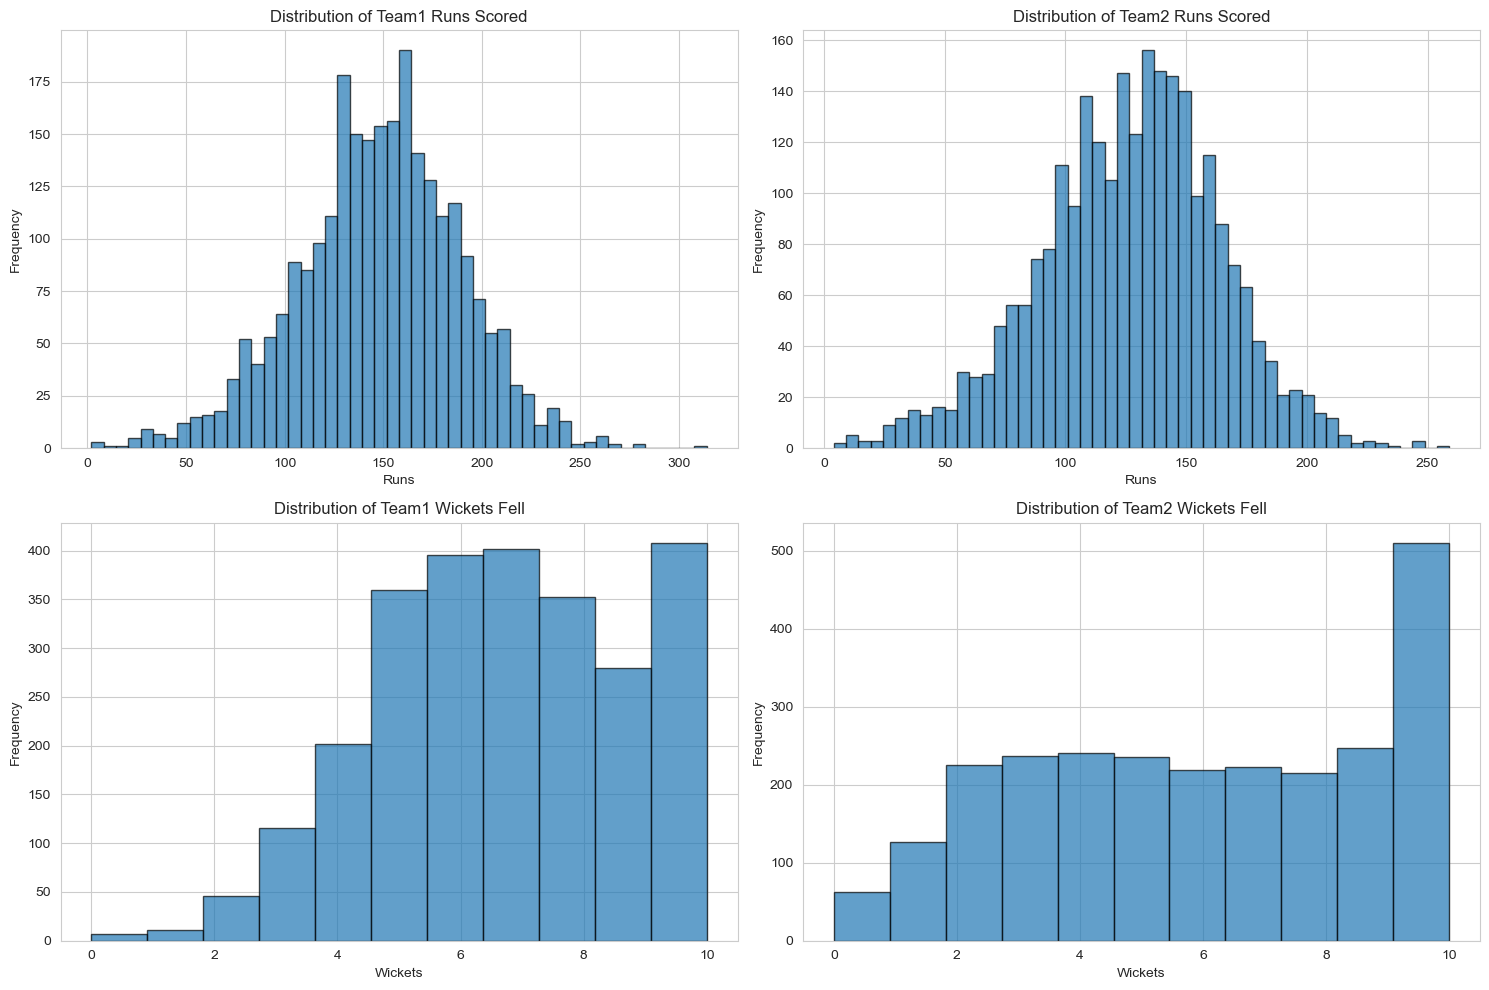

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].hist(matches['Team1 Runs Scored'].dropna(), bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Team1 Runs Scored')
axes[0, 0].set_xlabel('Runs')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(matches['Team2 Runs Scored'].dropna(), bins=50, edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Distribution of Team2 Runs Scored')
axes[0, 1].set_xlabel('Runs')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(matches['Team1 Wickets Fell'].dropna(), bins=11, edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Distribution of Team1 Wickets Fell')
axes[1, 0].set_xlabel('Wickets')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(matches['Team2 Wickets Fell'].dropna(), bins=11, edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Distribution of Team2 Wickets Fell')
axes[1, 1].set_xlabel('Wickets')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [12]:
matches['Team1 Runs Scored'].describe()

count    2579.000000
mean      147.713843
std        41.340798
min         2.000000
25%       123.000000
50%       149.000000
75%       175.000000
max       314.000000
Name: Team1 Runs Scored, dtype: float64

In [13]:
matches['Team2 Runs Scored'].describe()

count    2542.000000
mean      126.536192
std        37.353435
min         4.000000
25%       102.000000
50%       129.000000
75%       151.000000
max       259.000000
Name: Team2 Runs Scored, dtype: float64

## Batting Statistics Distribution

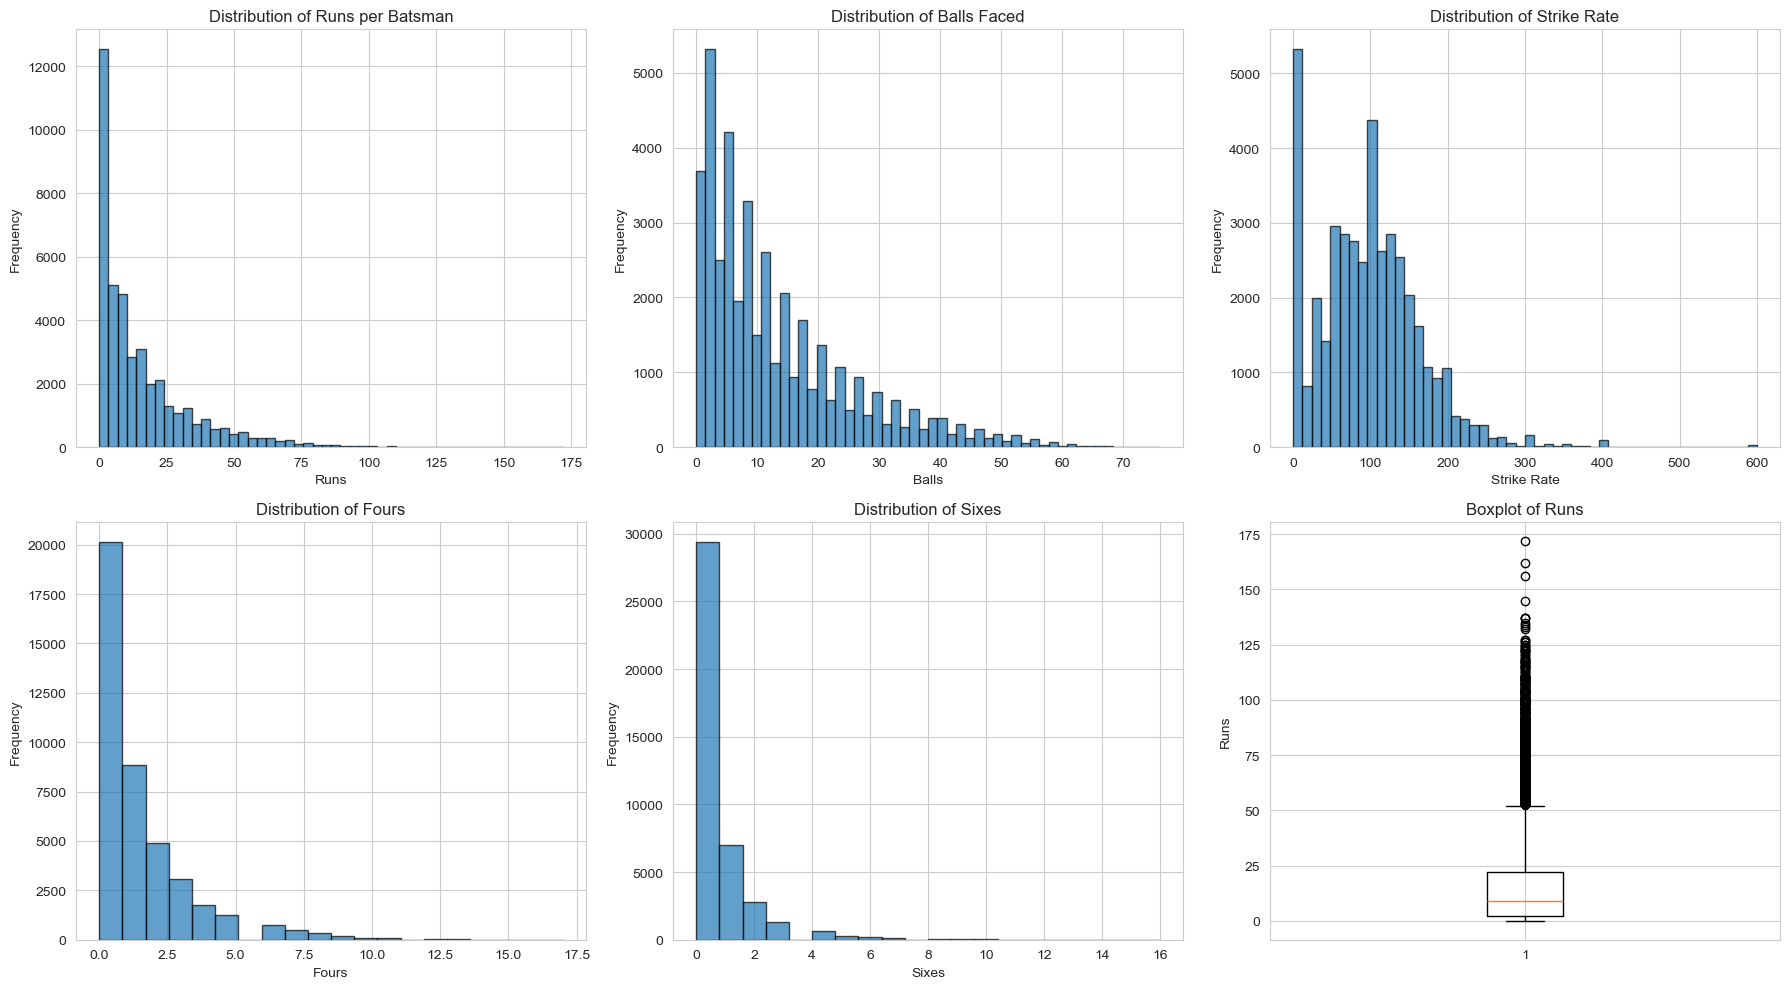

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

axes[0, 0].hist(batting['runs'].dropna(), bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Runs per Batsman')
axes[0, 0].set_xlabel('Runs')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(batting['balls'].dropna(), bins=50, edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Distribution of Balls Faced')
axes[0, 1].set_xlabel('Balls')
axes[0, 1].set_ylabel('Frequency')

axes[0, 2].hist(batting['strikeRate'].dropna(), bins=50, edgecolor='black', alpha=0.7)
axes[0, 2].set_title('Distribution of Strike Rate')
axes[0, 2].set_xlabel('Strike Rate')
axes[0, 2].set_ylabel('Frequency')

axes[1, 0].hist(batting['fours'].dropna(), bins=20, edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Distribution of Fours')
axes[1, 0].set_xlabel('Fours')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(batting['sixes'].dropna(), bins=20, edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Distribution of Sixes')
axes[1, 1].set_xlabel('Sixes')
axes[1, 1].set_ylabel('Frequency')

axes[1, 2].boxplot(batting['runs'].dropna())
axes[1, 2].set_title('Boxplot of Runs')
axes[1, 2].set_ylabel('Runs')

plt.tight_layout()
plt.show()

In [15]:
batting[['runs', 'balls', 'fours', 'sixes', 'strikeRate']].describe()

,runs,balls,fours,sixes,strikeRate
count,41872.000000,41872.000000,41872.000000,41872.000000,41872.000000
mean,15.692945,13.471365,1.324728,0.560542,96.998820
std,18.427531,12.413928,1.927253,1.157660,67.586434
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,0.000000,0.000000,50.000000
50%,9.000000,9.000000,1.000000,0.000000,100.000000
75%,22.000000,19.000000,2.000000,1.000000,135.290000
max,172.000000,76.000000,17.000000,16.000000,600.000000


## Bowling Statistics Distribution

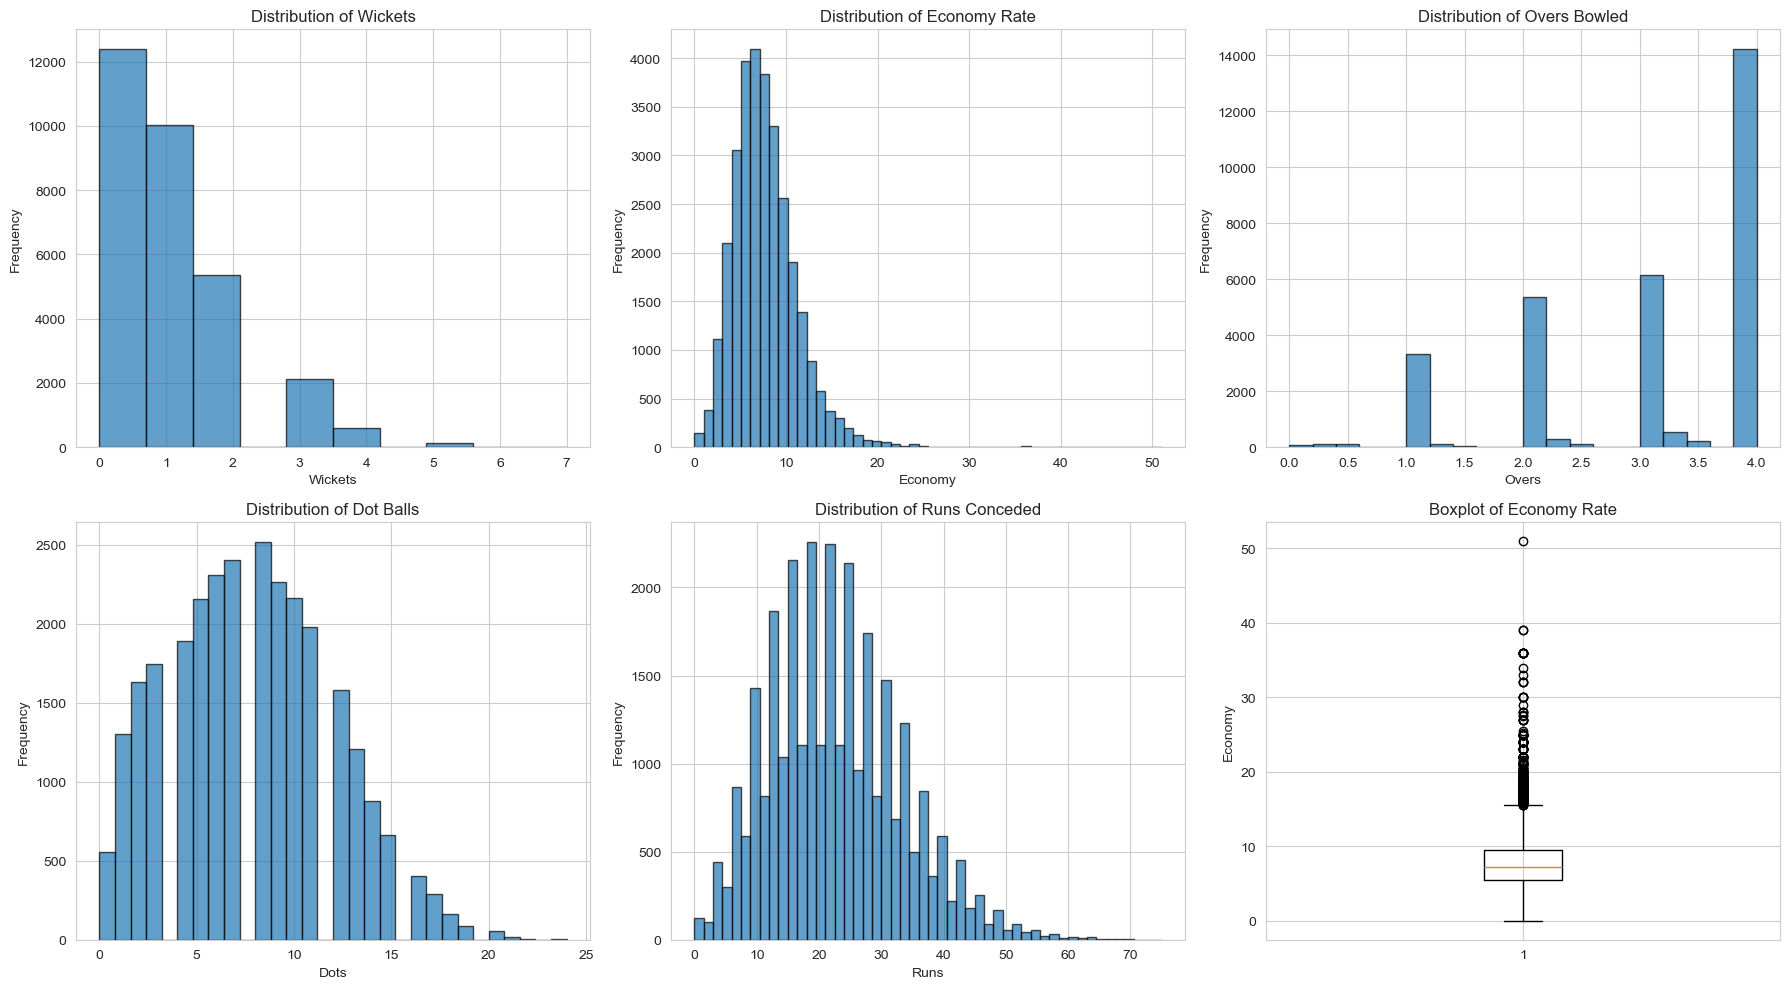

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

axes[0, 0].hist(bowling['wickets'].dropna(), bins=10, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Wickets')
axes[0, 0].set_xlabel('Wickets')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(bowling['economy'].dropna(), bins=50, edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Distribution of Economy Rate')
axes[0, 1].set_xlabel('Economy')
axes[0, 1].set_ylabel('Frequency')

axes[0, 2].hist(bowling['overs'].dropna(), bins=20, edgecolor='black', alpha=0.7)
axes[0, 2].set_title('Distribution of Overs Bowled')
axes[0, 2].set_xlabel('Overs')
axes[0, 2].set_ylabel('Frequency')

axes[1, 0].hist(bowling['dots'].dropna(), bins=30, edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Distribution of Dot Balls')
axes[1, 0].set_xlabel('Dots')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(bowling['conceded'].dropna(), bins=50, edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Distribution of Runs Conceded')
axes[1, 1].set_xlabel('Runs')
axes[1, 1].set_ylabel('Frequency')

axes[1, 2].boxplot(bowling['economy'].dropna())
axes[1, 2].set_title('Boxplot of Economy Rate')
axes[1, 2].set_ylabel('Economy')

plt.tight_layout()
plt.show()

In [17]:
bowling[['wickets', 'economy', 'overs', 'dots', 'conceded']].describe()

,wickets,economy,overs,dots,conceded
count,30622.000000,30622.000000,30622.000000,28275.000000,30622.000000
mean,0.985762,7.754426,3.042371,7.684527,22.426099
std,1.053077,3.482195,1.074969,4.192324,10.576888
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.500000,2.000000,4.000000,15.000000
50%,1.000000,7.250000,3.000000,8.000000,22.000000
75%,2.000000,9.500000,4.000000,11.000000,29.000000
max,7.000000,51.000000,4.000000,24.000000,75.000000


## Venue Statistics

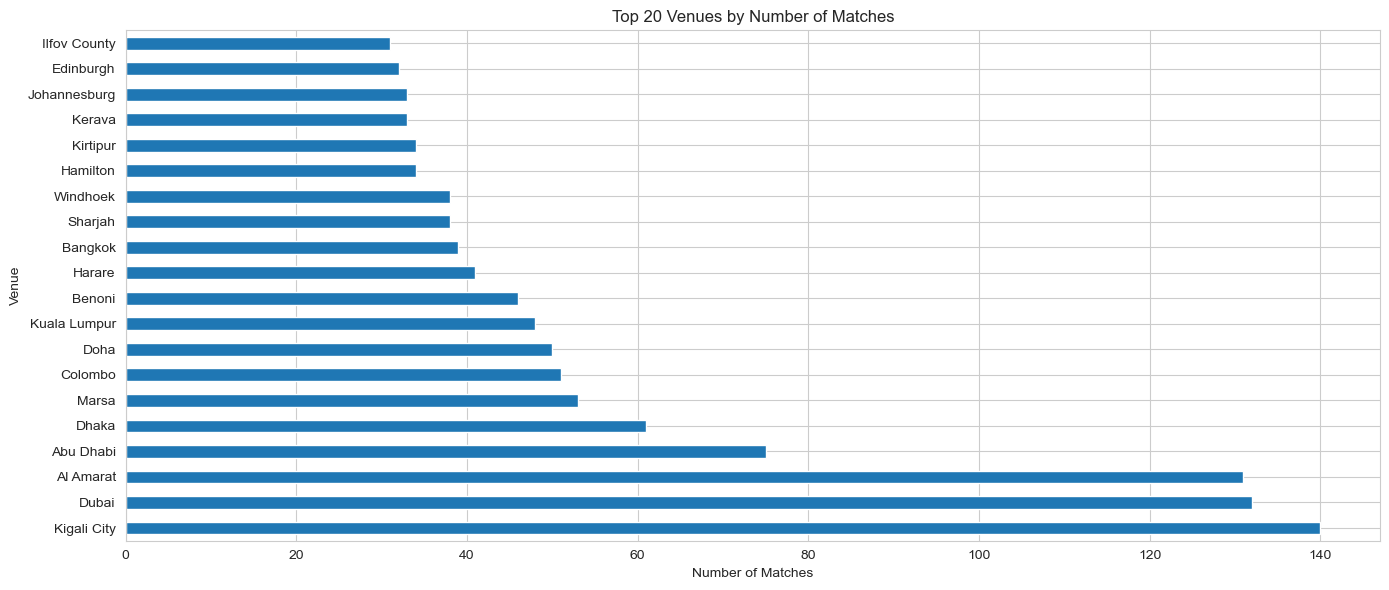

In [18]:
venue_matches = matches['Match Venue (City)'].value_counts().head(20)
plt.figure(figsize=(14, 6))
venue_matches.plot(kind='barh')
plt.title('Top 20 Venues by Number of Matches')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.tight_layout()
plt.show()

In [19]:
venue_stats = matches.groupby('Match Venue (City)').agg({
    'Team1 Runs Scored': 'mean',
    'Team2 Runs Scored': 'mean',
    'Team1 Wickets Fell': 'mean',
    'Team2 Wickets Fell': 'mean',
    'Match ID': 'count'
}).rename(columns={'Match ID': 'Matches_Count'})

venue_stats = venue_stats[venue_stats['Matches_Count'] >= 10].sort_values('Team1 Runs Scored', ascending=False)
venue_stats.head(15)

,Team1 Runs Scored,Team2 Runs Scored,Team1 Wickets Fell,Team2 Wickets Fell,Matches_Count
Match Venue (City),,,,,
Karachi,189.727273,148.181818,5.000000,6.909091,11
Centurion,179.785714,160.142857,6.214286,6.428571,14
Johannesburg,174.151515,147.181818,6.787879,5.939394,33
Adelaide,173.615385,148.307692,5.615385,6.923077,13
Southampton,173.181818,140.000000,6.909091,6.272727,11
Auckland,170.071429,149.107143,6.821429,6.750000,28
Lahore,169.869565,152.173913,5.869565,6.826087,23
Kirtipur,168.588235,145.727273,6.323529,6.515152,34
Kandy,168.260870,149.347826,5.652174,6.304348,23


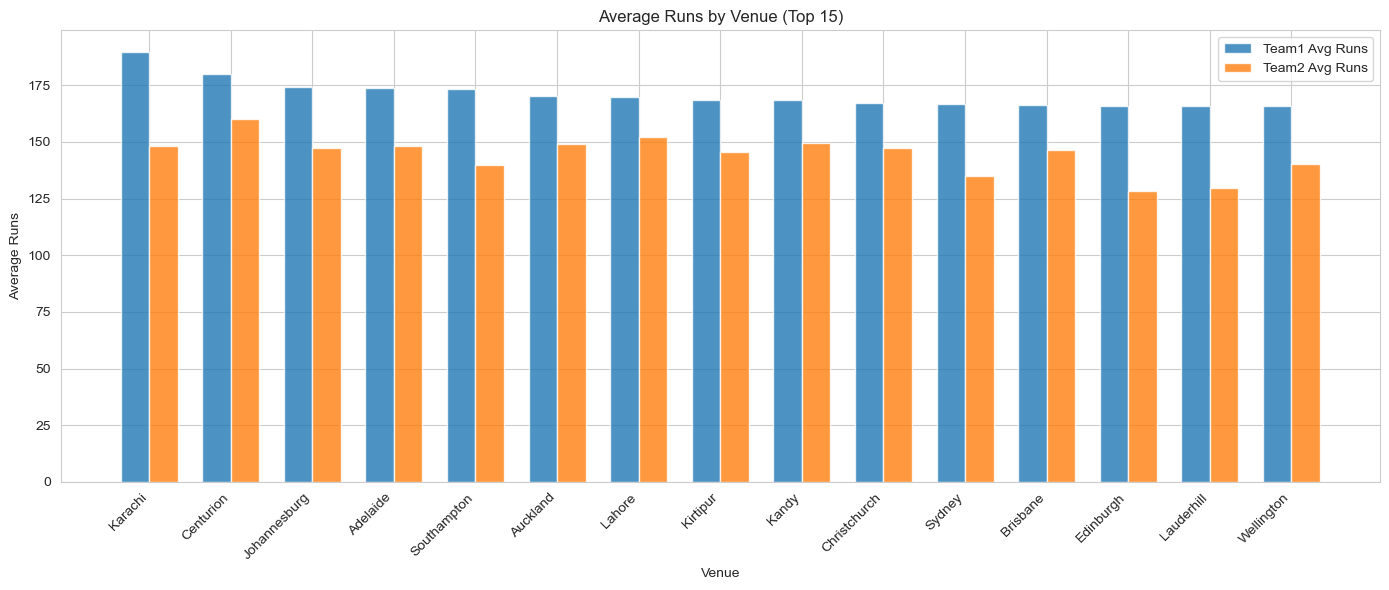

In [20]:
top_venues = venue_stats.head(15)
plt.figure(figsize=(14, 6))
x = range(len(top_venues))
width = 0.35

plt.bar([i - width/2 for i in x], top_venues['Team1 Runs Scored'], width, label='Team1 Avg Runs', alpha=0.8)
plt.bar([i + width/2 for i in x], top_venues['Team2 Runs Scored'], width, label='Team2 Avg Runs', alpha=0.8)

plt.xlabel('Venue')
plt.ylabel('Average Runs')
plt.title('Average Runs by Venue (Top 15)')
plt.xticks(x, top_venues.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

## Country-wise Statistics

In [21]:
country_stats = matches.groupby('Match Venue (Country)').agg({
    'Team1 Runs Scored': 'mean',
    'Team2 Runs Scored': 'mean',
    'Match ID': 'count'
}).rename(columns={'Match ID': 'Matches_Count'})

country_stats = country_stats[country_stats['Matches_Count'] >= 10].sort_values('Matches_Count', ascending=False)
country_stats.head(15)

,Team1 Runs Scored,Team2 Runs Scored,Matches_Count
Match Venue (Country),,,
United Arab Emirates,145.318367,127.297959,245
South Africa,151.420690,132.110345,146
Rwanda,130.992754,98.719697,140
India,165.372093,147.984252,131
Oman,149.251908,131.824427,131
West Indies,149.208000,129.391667,125
Bangladesh,149.000000,131.100000,110
Australia,155.461538,136.310680,104
New Zealand,169.895833,149.967742,96


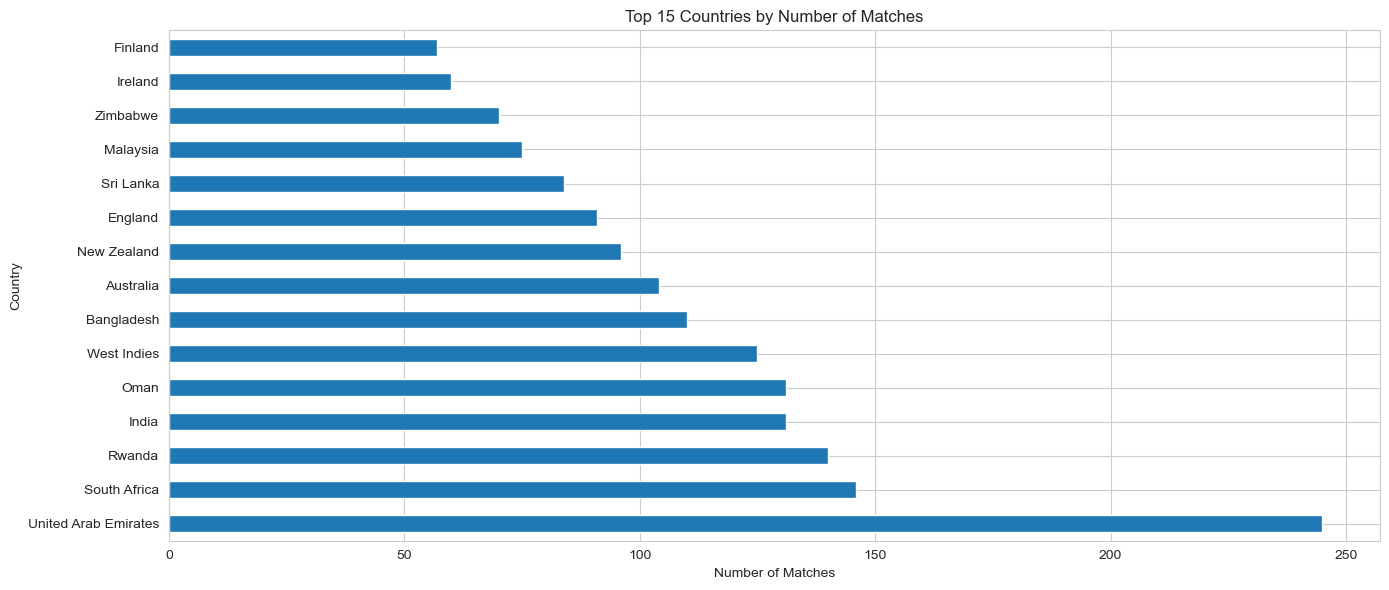

In [22]:
plt.figure(figsize=(14, 6))
country_stats.head(15)['Matches_Count'].plot(kind='barh')
plt.title('Top 15 Countries by Number of Matches')
plt.xlabel('Number of Matches')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

## Team Performance Analysis

In [23]:
team1_stats = matches.groupby('Team1 Name').agg({
    'Team1 Runs Scored': 'mean',
    'Team1 Wickets Fell': 'mean',
    'Match ID': 'count'
}).rename(columns={'Match ID': 'Matches_as_Team1'})

team2_stats = matches.groupby('Team2 Name').agg({
    'Team2 Runs Scored': 'mean',
    'Team2 Wickets Fell': 'mean',
    'Match ID': 'count'
}).rename(columns={'Match ID': 'Matches_as_Team2'})

team_combined = pd.DataFrame()
all_teams = set(team1_stats.index).union(set(team2_stats.index))

for team in all_teams:
    t1_runs = team1_stats.loc[team, 'Team1 Runs Scored'] if team in team1_stats.index else 0
    t2_runs = team2_stats.loc[team, 'Team2 Runs Scored'] if team in team2_stats.index else 0
    t1_matches = team1_stats.loc[team, 'Matches_as_Team1'] if team in team1_stats.index else 0
    t2_matches = team2_stats.loc[team, 'Matches_as_Team2'] if team in team2_stats.index else 0
    
    total_matches = t1_matches + t2_matches
    avg_runs = ((t1_runs * t1_matches) + (t2_runs * t2_matches)) / total_matches if total_matches > 0 else 0
    
    team_combined = pd.concat([team_combined, pd.DataFrame({
        'Team': [team],
        'Total_Matches': [total_matches],
        'Avg_Runs': [avg_runs]
    })], ignore_index=True)

team_combined = team_combined[team_combined['Total_Matches'] >= 10].sort_values('Avg_Runs', ascending=False)
team_combined.head(20)

,Team,Total_Matches,Avg_Runs
17,India,219,160.429492
92,England,182,157.829670
84,Australia,188,154.154255
55,South Africa,173,153.351368
21,New Zealand,216,152.240838
36,Czech Rep.,36,152.222222
73,Pakistan,236,150.567918
66,Romania,38,149.105263
104,Afghanistan,130,148.923077
20,Qatar,51,148.216412


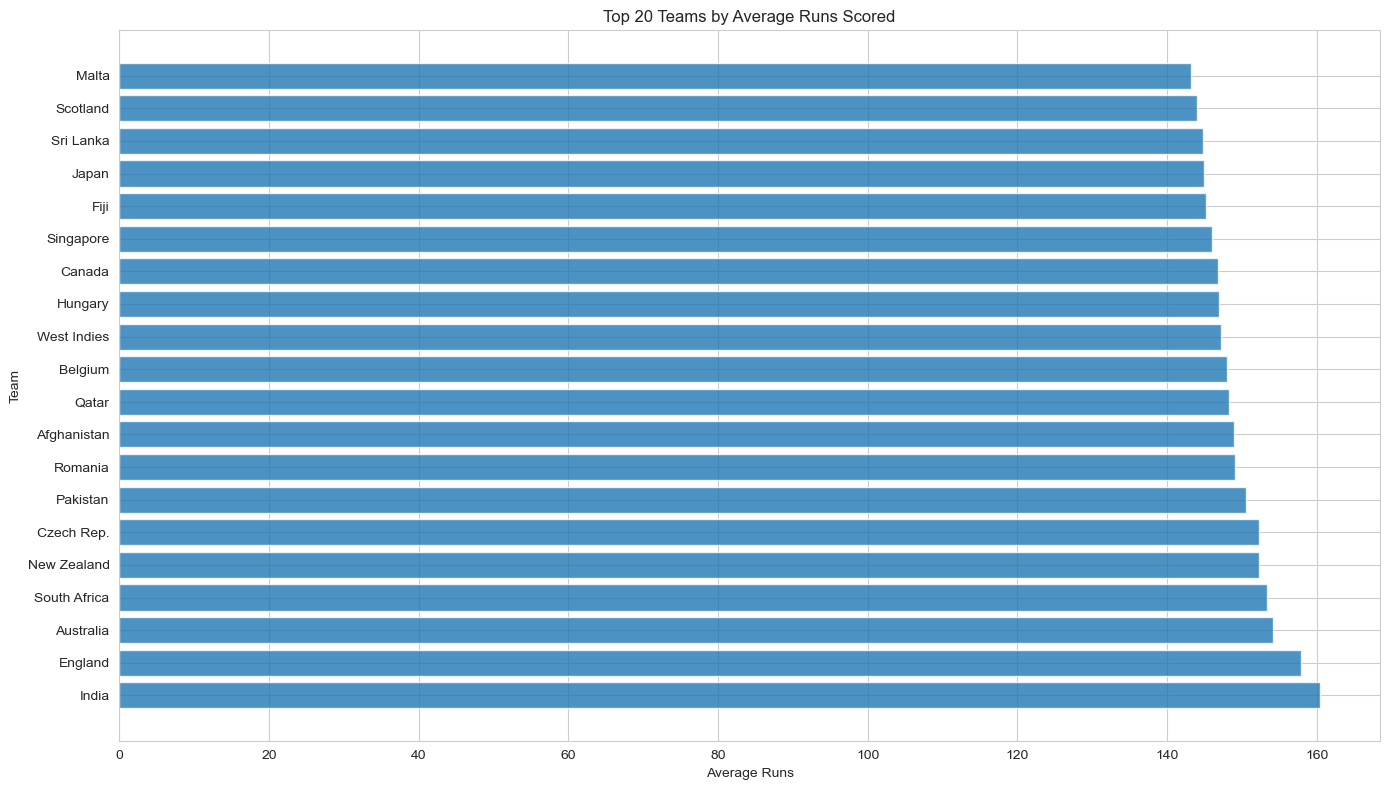

In [24]:
plt.figure(figsize=(14, 8))
top_teams = team_combined.head(20)
plt.barh(top_teams['Team'], top_teams['Avg_Runs'], alpha=0.8)
plt.xlabel('Average Runs')
plt.ylabel('Team')
plt.title('Top 20 Teams by Average Runs Scored')
plt.tight_layout()
plt.show()

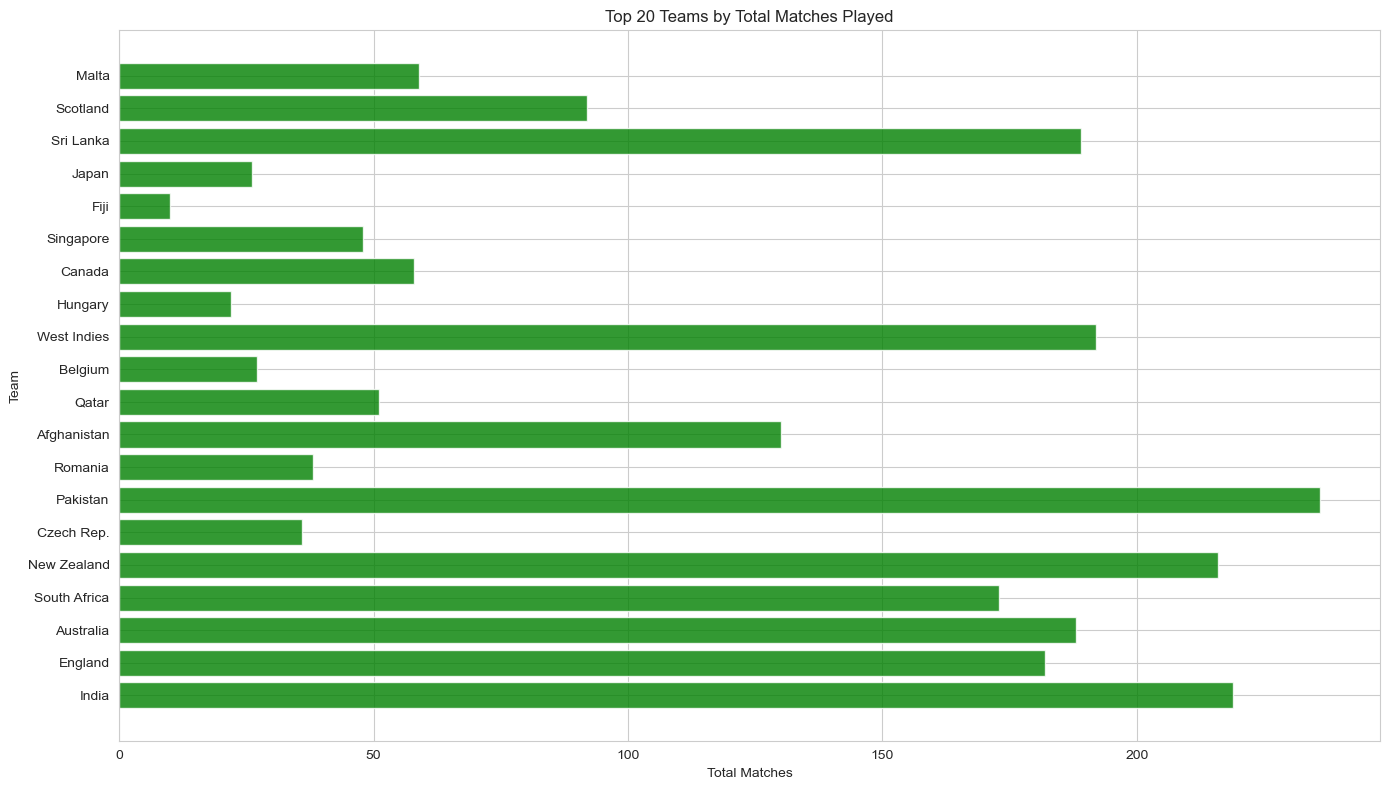

In [25]:
plt.figure(figsize=(14, 8))
plt.barh(top_teams['Team'], top_teams['Total_Matches'], alpha=0.8, color='green')
plt.xlabel('Total Matches')
plt.ylabel('Team')
plt.title('Top 20 Teams by Total Matches Played')
plt.tight_layout()
plt.show()

## Toss Impact Analysis

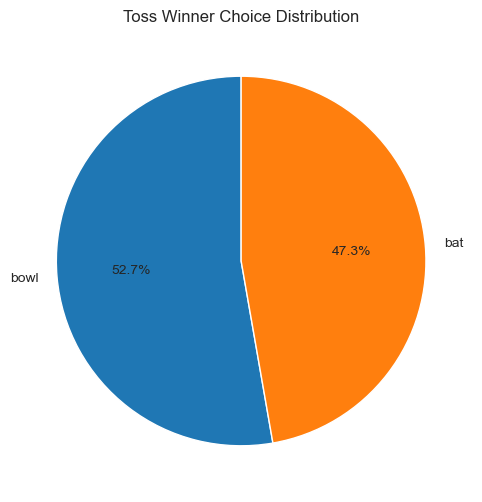

In [26]:
toss_choice = matches['Toss Winner Choice'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(toss_choice, labels=toss_choice.index, autopct='%1.1f%%', startangle=90)
plt.title('Toss Winner Choice Distribution')
plt.show()

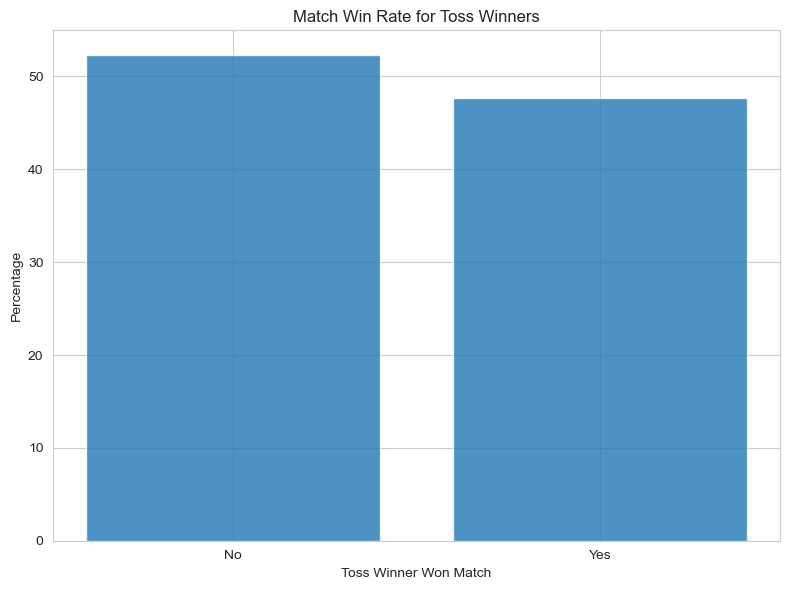

Toss winners win the match: 47.65%


In [27]:
matches['Toss_Win'] = matches['Toss Winner'] == matches['Match Winner']
toss_win_rate = matches['Toss_Win'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
plt.bar(toss_win_rate.index, toss_win_rate.values, alpha=0.8)
plt.xlabel('Toss Winner Won Match')
plt.ylabel('Percentage')
plt.title('Match Win Rate for Toss Winners')
plt.xticks([True, False], ['Yes', 'No'])
plt.tight_layout()
plt.show()

print(f"Toss winners win the match: {toss_win_rate[True]:.2f}%")

## Runs vs Wickets Correlation

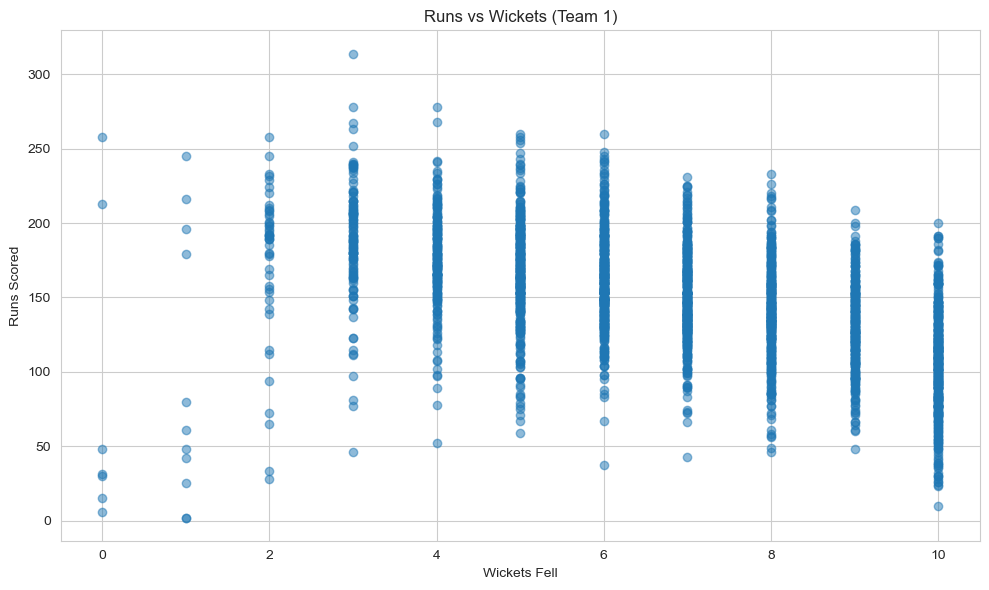

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(matches['Team1 Wickets Fell'], matches['Team1 Runs Scored'], alpha=0.5)
plt.xlabel('Wickets Fell')
plt.ylabel('Runs Scored')
plt.title('Runs vs Wickets (Team 1)')
plt.tight_layout()
plt.show()

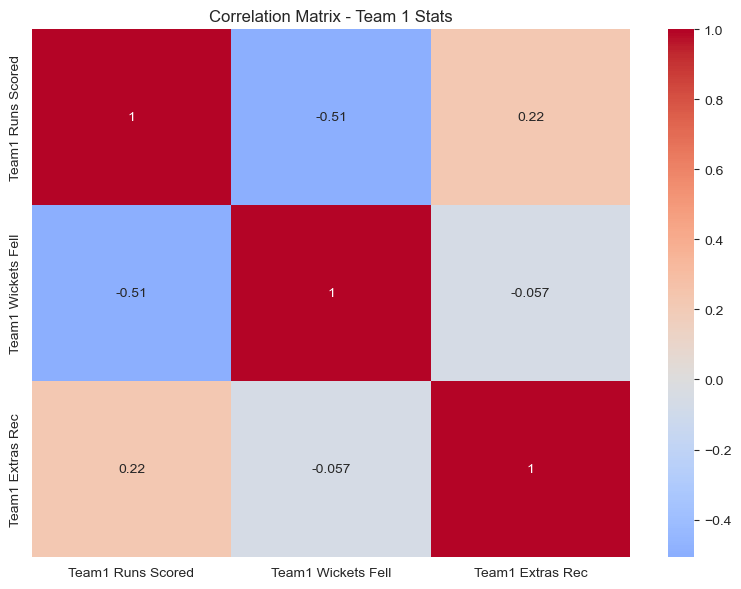

In [29]:
correlation = matches[['Team1 Runs Scored', 'Team1 Wickets Fell', 'Team1 Extras Rec']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix - Team 1 Stats')
plt.tight_layout()
plt.show()

## Match Date Analysis

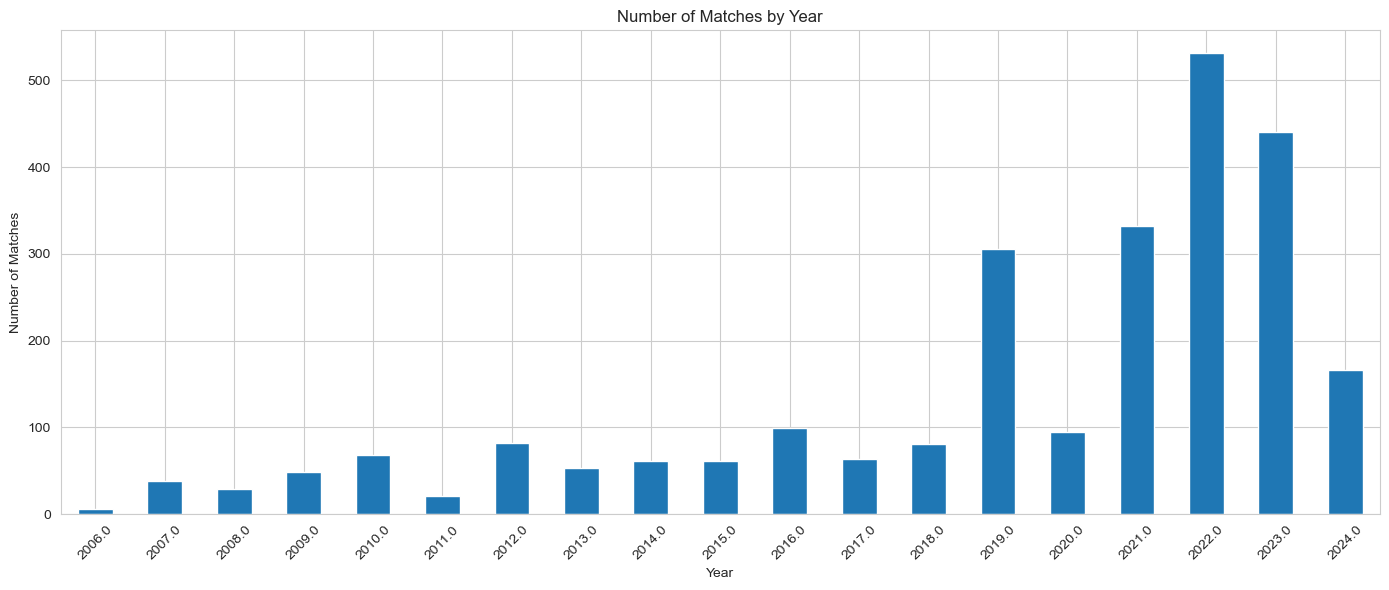

In [30]:
matches['Match Date'] = pd.to_datetime(matches['Match Date'])
matches['Year'] = matches['Match Date'].dt.year
matches['Month'] = matches['Match Date'].dt.month

year_matches = matches['Year'].value_counts().sort_index()
plt.figure(figsize=(14, 6))
year_matches.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.title('Number of Matches by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

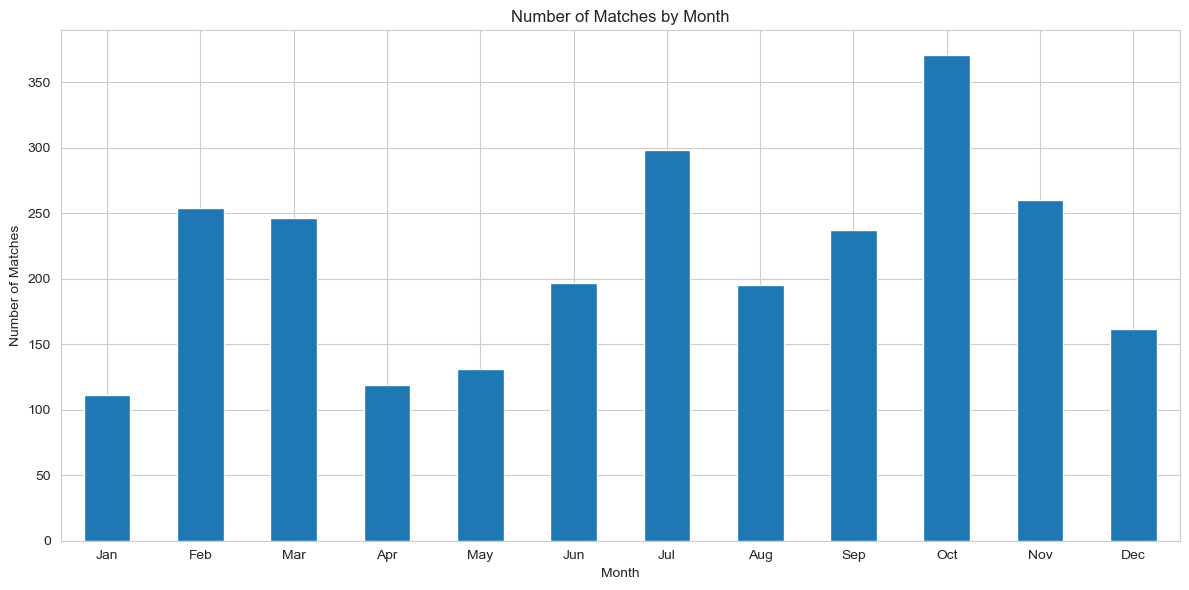

In [31]:
month_matches = matches['Month'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
month_matches.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Matches')
plt.title('Number of Matches by Month')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.tight_layout()
plt.show()

## Top Scorers Analysis

In [32]:
top_scores = batting.nlargest(20, 'runs')[['batsman', 'runs', 'balls', 'strikeRate', 'fours', 'sixes']]
top_scores

,batsman,runs,balls,strikeRate,fours,sixes
14908,35812.0,172.0,76.0,226.31,16.0,10.0
15905,79157.0,162.0,62.0,261.29,11.0,16.0
6167,35812.0,156.0,63.0,247.61,11.0,14.0
12225,54222.0,145.0,65.0,223.07,14.0,9.0
35450,106716.0,137.0,49.0,279.59,7.0,15.0
48983,102117.0,137.0,50.0,274.00,8.0,12.0
51378,89097.0,137.0,62.0,220.96,5.0,16.0
54253,95739.0,135.0,62.0,217.74,11.0,10.0
53806,113484.0,134.0,68.0,197.05,8.0,12.0
25366,71363.0,133.0,73.0,182.19,15.0,6.0


In [33]:
batsman_stats = batting.groupby('batsman').agg({
    'runs': ['sum', 'mean', 'count'],
    'strikeRate': 'mean',
    'fours': 'sum',
    'sixes': 'sum'
}).reset_index()

batsman_stats.columns = ['batsman', 'total_runs', 'avg_runs', 'innings', 'avg_sr', 'total_fours', 'total_sixes']
batsman_stats = batsman_stats[batsman_stats['innings'] >= 20].sort_values('total_runs', ascending=False)
batsman_stats.head(20)

,batsman,total_runs,avg_runs,innings,avg_sr,total_fours,total_sixes
665,49752.0,4037.0,37.036697,109,122.823211,361.0,117.0
553,48405.0,3974.0,27.790210,143,115.734825,359.0,190.0
961,56880.0,3823.0,35.728972,107,111.751308,409.0,62.0
591,48927.0,3531.0,29.923729,118,121.606356,309.0,173.0
777,52631.0,3491.0,25.669118,136,114.925147,407.0,124.0
346,35812.0,3120.0,30.291262,103,119.522136,309.0,125.0
581,48739.0,3099.0,30.087379,103,125.650680,320.0,113.0
882,54018.0,3048.0,38.100000,80,108.935000,260.0,82.0
840,53271.0,2927.0,27.876190,105,128.131524,263.0,123.0
706,51088.0,2547.0,29.275862,87,115.267356,242.0,58.0


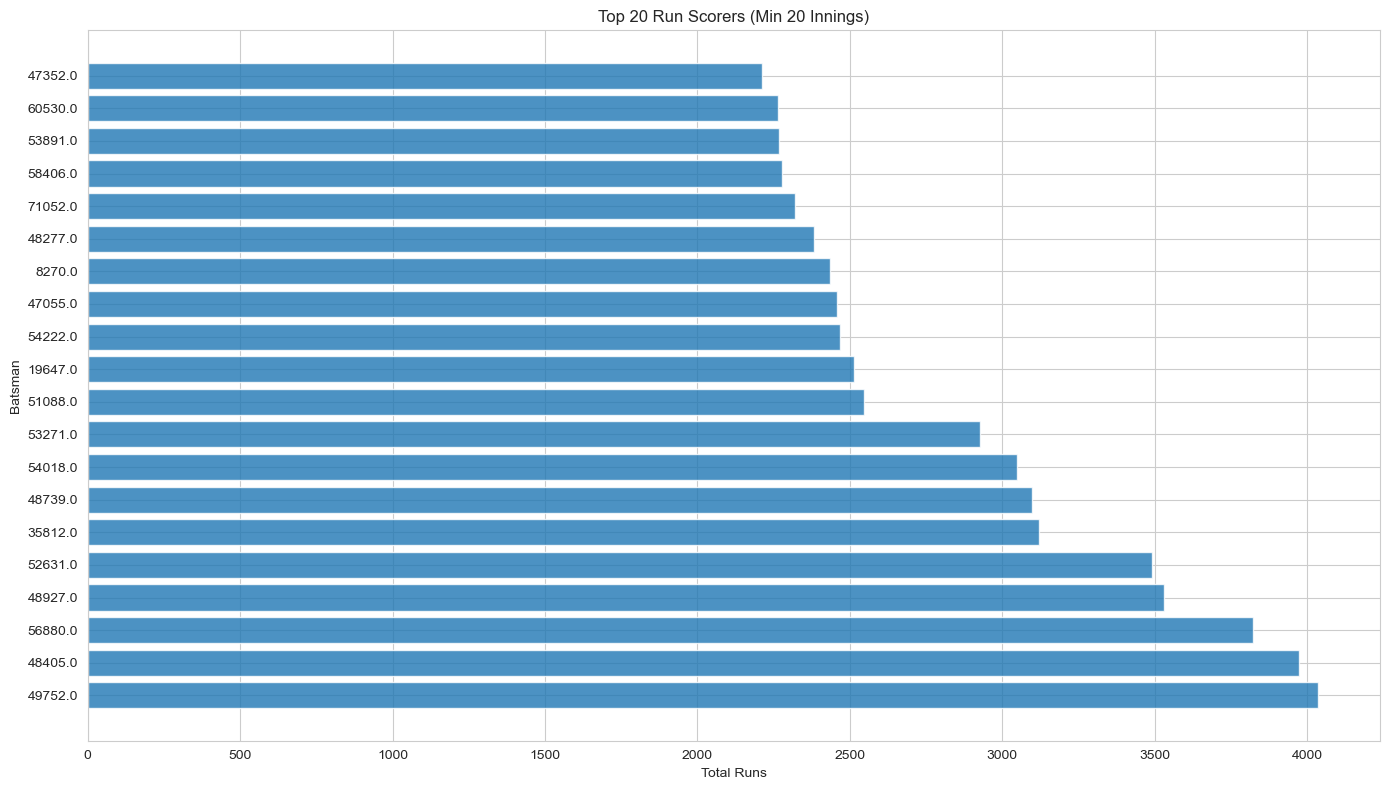

In [34]:
plt.figure(figsize=(14, 8))
top_batsmen = batsman_stats.head(20)
plt.barh(range(len(top_batsmen)), top_batsmen['total_runs'], alpha=0.8)
plt.yticks(range(len(top_batsmen)), top_batsmen['batsman'])
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.title('Top 20 Run Scorers (Min 20 Innings)')
plt.tight_layout()
plt.show()

## Top Bowlers Analysis

In [35]:
bowler_stats = bowling.groupby('bowler id').agg({
    'wickets': ['sum', 'mean', 'count'],
    'economy': 'mean',
    'dots': 'sum'
}).reset_index()

bowler_stats.columns = ['bowler_id', 'total_wickets', 'avg_wickets', 'matches', 'avg_economy', 'total_dots']
bowler_stats = bowler_stats[bowler_stats['matches'] >= 20].sort_values('total_wickets', ascending=False)
bowler_stats.head(20)

,bowler_id,total_wickets,avg_wickets,matches,avg_economy,total_dots
401,49108.0,157.0,1.308333,120,8.212333,1086.0
356,48277.0,140.0,1.217391,115,6.833391,985.0
1199,79159.0,138.0,1.623529,85,6.039176,792.0
1003,67586.0,136.0,1.225225,111,8.250090,763.0
893,64864.0,111.0,1.132653,98,7.381429,811.0
957,66012.0,107.0,1.389610,77,7.728312,708.0
598,54674.0,107.0,1.188889,90,7.725000,819.0
423,49427.0,107.0,1.070000,100,7.676400,769.0
1266,84937.0,107.0,1.175824,91,7.229560,760.0
241,45105.0,107.0,1.289157,83,7.417831,713.0


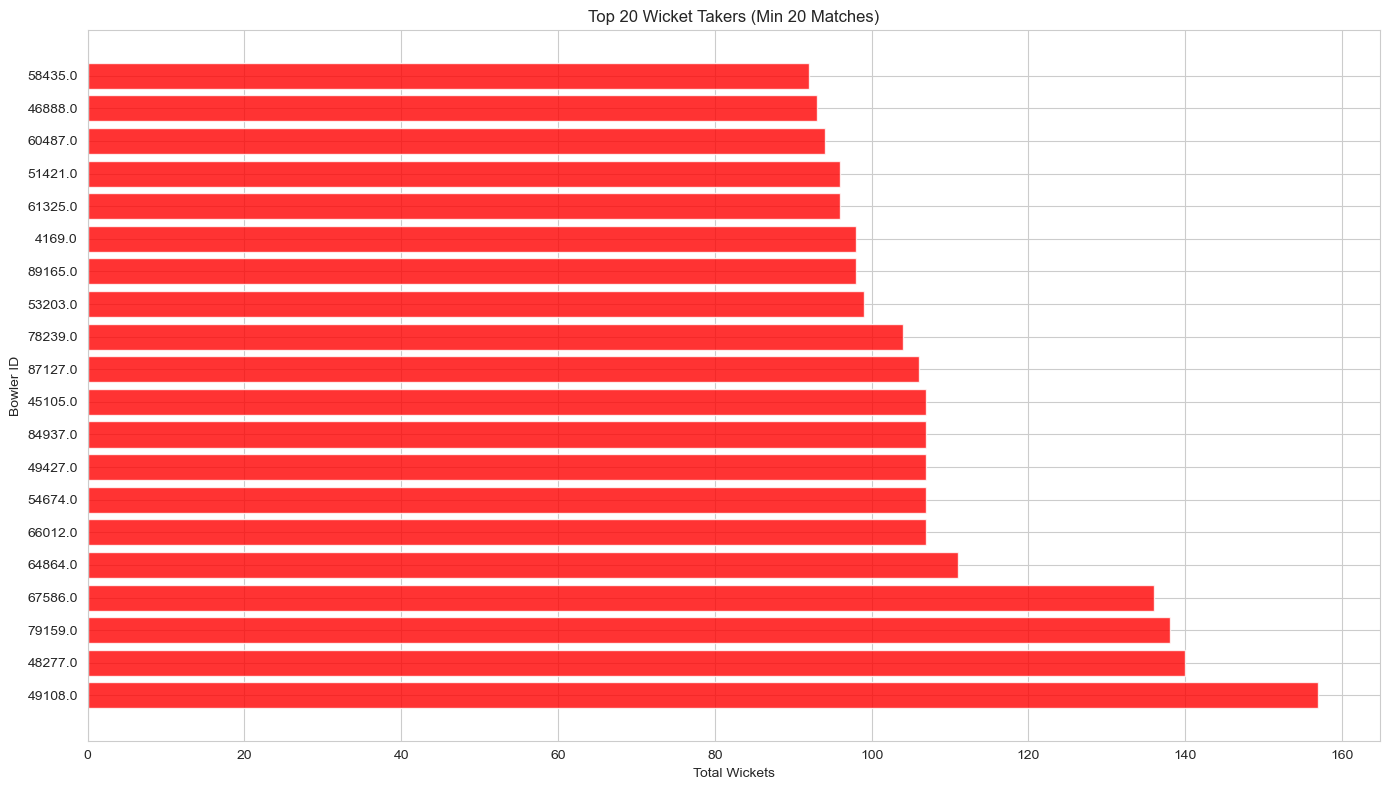

In [36]:
plt.figure(figsize=(14, 8))
top_bowlers = bowler_stats.head(20)
plt.barh(range(len(top_bowlers)), top_bowlers['total_wickets'], alpha=0.8, color='red')
plt.yticks(range(len(top_bowlers)), top_bowlers['bowler_id'])
plt.xlabel('Total Wickets')
plt.ylabel('Bowler ID')
plt.title('Top 20 Wicket Takers (Min 20 Matches)')
plt.tight_layout()
plt.show()

## Key Findings Summary

In [37]:
print("="*60)
print("KEY EDA FINDINGS")
print("="*60)
print(f"\nDataset Overview:")
print(f"  Total Matches: {len(matches)}")
print(f"  Total Batting Records: {len(batting)}")
print(f"  Total Bowling Records: {len(bowling)}")
print(f"  Date Range: {matches['Match Date'].min()} to {matches['Match Date'].max()}")

print(f"\nRuns Statistics:")
print(f"  Average Team Score: {matches['Team1 Runs Scored'].mean():.2f}")
print(f"  Highest Team Score: {matches['Team1 Runs Scored'].max():.0f}")
print(f"  Lowest Team Score: {matches['Team1 Runs Scored'].min():.0f}")

print(f"\nVenue Insights:")
print(f"  Total Unique Venues: {matches['Match Venue (City)'].nunique()}")
print(f"  Total Countries: {matches['Match Venue (Country)'].nunique()}")
print(f"  Most Matches Venue: {venue_matches.index[0]} ({venue_matches.values[0]} matches)")

print(f"\nTeam Statistics:")
print(f"  Total Teams: {len(all_teams)}")
print(f"  Top Scoring Team: {team_combined.iloc[0]['Team']} (Avg: {team_combined.iloc[0]['Avg_Runs']:.2f})")

print(f"\nToss Impact:")
print(f"  Toss Winners Win Rate: {toss_win_rate[True]:.2f}%")

print(f"\nData Quality:")
print(f"  Matches Missing Values: {matches.isnull().sum().sum()}")
print(f"  Batting Missing Values: {batting.isnull().sum().sum()}")
print(f"  Bowling Missing Values: {bowling.isnull().sum().sum()}")
print("="*60)

KEY EDA FINDINGS

Dataset Overview:
  Total Matches: 2592
  Total Batting Records: 56357
  Total Bowling Records: 30648
  Date Range: 2006-06-15 00:00:00 to 2024-05-07 00:00:00

Runs Statistics:
  Average Team Score: 147.71
  Highest Team Score: 314
  Lowest Team Score: 2

Venue Insights:
  Total Unique Venues: 166
  Total Countries: 66
  Most Matches Venue: Kigali City (140 matches)

Team Statistics:
  Total Teams: 105
  Top Scoring Team: India (Avg: 160.43)

Toss Impact:
  Toss Winners Win Rate: 47.65%

Data Quality:
  Matches Missing Values: 1117
  Batting Missing Values: 125403
  Bowling Missing Values: 7405
